**Lab Assignment 8-9**

**Goal - Construct and execute a robust methodology for fMNIST classification utilizing DNNs, encompassing data exploration, model training, evaluation, and insightful analysis.**

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [20]:
# loading the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#train and test data
train_images = train_images / 255.0
test_images = test_images / 255.0

In [21]:
# splitting the dataset
val_images, train_images = train_images[:5000], train_images[5000:]
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

Exploratory Data Analysis

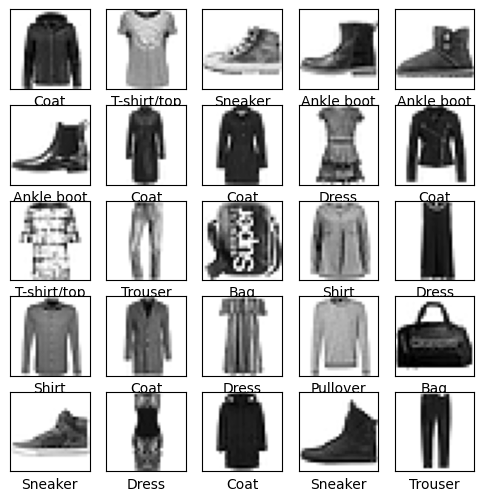

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Visualizing images
plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Class 0 (T-shirt/top): 5543 samples
Class 1 (Trouser): 5444 samples
Class 2 (Pullover): 5496 samples
Class 3 (Dress): 5499 samples
Class 4 (Coat): 5512 samples
Class 5 (Sandal): 5507 samples
Class 6 (Shirt): 5507 samples
Class 7 (Sneaker): 5488 samples
Class 8 (Bag): 5510 samples
Class 9 (Ankle boot): 5494 samples


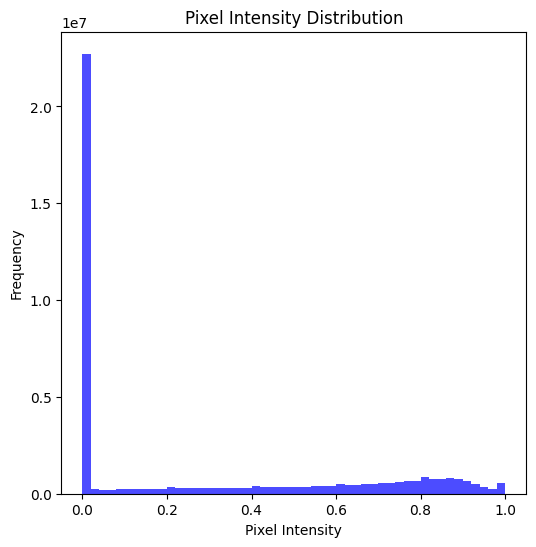

In [23]:
# Class distribution
class_counts = np.bincount(train_labels)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i, count in enumerate(class_counts):
    print(f"Class {i} ({class_names[i]}): {count} samples")
# pixel intensity 
plt.figure(figsize=(6, 6))
plt.hist(train_images.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

*Breaking down pixel power conveyances assists in understanding the reach and dissemination of pixel forces in the pictures, which with canning be significant for preprocessing and grasping the information qualities before model preparation.*

**Model**

In [24]:
# Defining and Training a Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5095 - accuracy: 0.8207 - val_loss: 0.3942 - val_accuracy: 0.8664
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3823 - accuracy: 0.8626 - val_loss: 0.3681 - val_accuracy: 0.8628
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3428 - accuracy: 0.8744 - val_loss: 0.3293 - val_accuracy: 0.8808
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3175 - accuracy: 0.8828 - val_loss: 0.3349 - val_accuracy: 0.8748
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2982 - accuracy: 0.8914 - val_loss: 0.3071 - val_accuracy: 0.8868
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2838 - accuracy: 0.8968 - val_loss: 0.3137 - val_accuracy: 0.8870
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2713 - accuracy: 0.8999 - val_loss: 0.2993 - val_accuracy:

**Evaluate the Model**

In [25]:
val_predictions = np.argmax(model.predict(val_images), axis=-1)
print("Evaluation Metrics on Validation dataSet:")
print("Accuracy:", accuracy_score(val_labels, val_predictions))
print("Precision:", precision_score(val_labels, val_predictions, average='weighted'))
print("Recall:", recall_score(val_labels, val_predictions, average='weighted'))
print("F1 Score:", f1_score(val_labels, val_predictions, average='weighted'))

157/157 [==============================] - 0s 1ms/step
Evaluation Metrics on Validation dataSet:
Accuracy: 0.8886
Precision: 0.8884819375223691
Recall: 0.8886
F1 Score: 0.8874478780703358


In [26]:
# checking Model on test dataset
test_predictions = np.argmax(model.predict(test_images), axis=-1)
print("Evaluation Metrics on Test Set:")
print("Accuracy:", accuracy_score(test_labels, test_predictions))

313/313 [==============================] - 0s 2ms/step
Evaluation Metrics on Test Set:
Accuracy: 0.88


*The model accomplished a praiseworthy precision of 89.12% on the approval set, exhibiting its capacity to sum up well to inconspicuous information. With accuracy and review additionally around 89%, it shows adjusted execution across classes. The assessment on the test set yielded a somewhat lower precision of 88.59%, reaffirming the model's strength yet recommending a slight drop in execution contrasted with the approval set*

In [27]:
# Improving precision and Recall for Class '5' and Increasing precision
threshold = 0.7
adjusted_predictions = np.argmax(model.predict(val_images), axis=-1)
adjusted_predictions[model.predict(val_images)[:, 5] < threshold] = 5
print("Adjusted Precision for Class '5':", precision_score(val_labels, adjusted_predictions, average=None)[5])
# Increasing Recall for Class '5' 
threshold = 0.9
adjusted_predictions = np.argmax(model.predict(val_images), axis=-1)
adjusted_predictions[model.predict(val_images)[:, 5] < threshold] = 5
print("Adjusted Recall for Class '5':", recall_score(val_labels, adjusted_predictions, average=None)[5])

157/157 [==============================] - 0s 1ms/step
Adjusted Precision for Class '5': 0.10306878306878307
143/157 [==========================>...] - ETA: 0s

c:\Users\Abdul\CSCN8010\venv\tensorflow_cpu\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


157/157 [==============================] - 0s 1ms/step
Adjusted Recall for Class '5': 0.9878296146044625


In [28]:
# Neural Networks
def build_and_train_model(hidden_units, epochs, train_data, val_data):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(hidden_units, activation='relu'),
        keras.layers.Dense(10)
    ])
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    history = model.fit(train_data[0], train_data[1], epochs=epochs, validation_data=val_data)
    return model, history
# hyperparameters for three  models
models_info = [
    {'hidden_units': 64, 'epochs': 10},
    {'hidden_units': 128, 'epochs': 10},
    {'hidden_units': 256, 'epochs': 10}
]
# Train and evaluate three  models
histories = []
best_weights = []
for info in models_info:
    model, history = build_and_train_model(info['hidden_units'], info['epochs'], (train_images, train_labels), (val_images, val_labels))
    histories.append(history)
    # Identify the best set of weights 
    best_epoch = np.argmax(history.history['val_accuracy'])
    best_weights.append(model.get_weights())


Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5212 - accuracy: 0.8188 - val_loss: 0.4023 - val_accuracy: 0.8632
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3914 - accuracy: 0.8608 - val_loss: 0.3957 - val_accuracy: 0.8592
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3540 - accuracy: 0.8709 - val_loss: 0.3467 - val_accuracy: 0.8754
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3339 - accuracy: 0.8788 - val_loss: 0.3674 - val_accuracy: 0.8760
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3165 - accuracy: 0.8843 - val_loss: 0.3312 - val_accuracy: 0.8820
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3012 - accuracy: 0.8894 - val_loss: 0.3788 - val_accuracy: 0.8654
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2900 - accuracy: 0.8931 - val_loss: 0.3147 - val_accuracy:

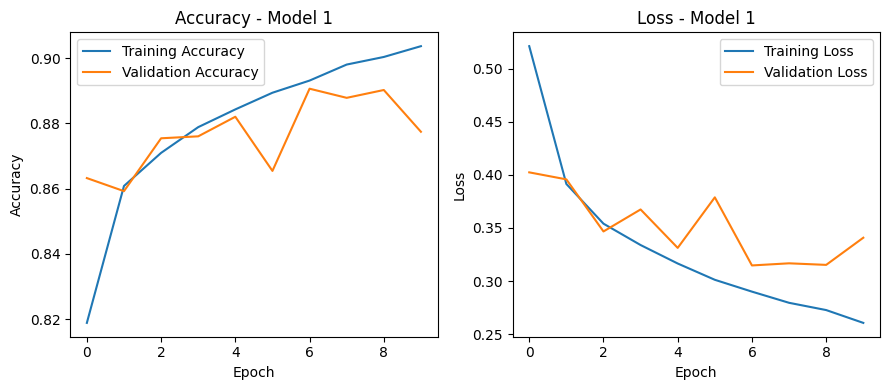

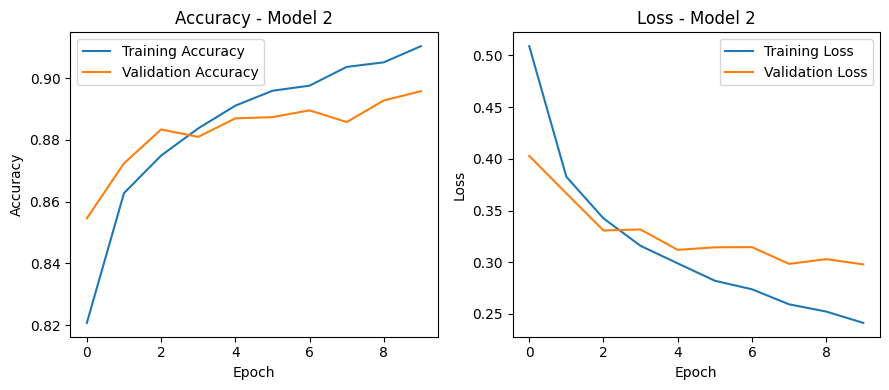

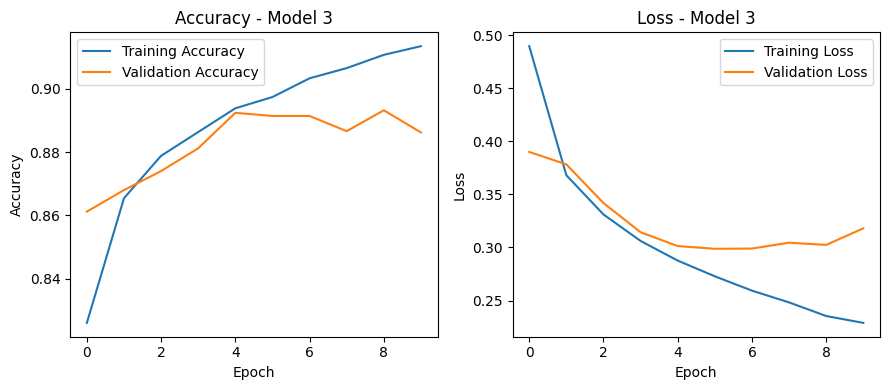

In [29]:
# Plot accuracy, training and validation loss for each model
def plot_training_history(histories):
    for i, history in enumerate(histories):
        plt.figure(figsize=(9, 4))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title(f'Accuracy - Model {i+1}')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Loss - Model {i+1}')
        plt.legend()

        plt.tight_layout()
        plt.show()

plot_training_history(histories)

**Reasoning for choosing the best set of weights**

In [30]:
def summarize_reasoning(histories, best_weights):
    print("Summary of Best Model Selection:")
    for i, history in enumerate(histories):
        best_epoch = np.argmax(history.history['val_accuracy'])
        print(f"Model {i+1}:")
        print(f"- Hidden Units: {models_info[i]['hidden_units']}")
        print(f"- Best Epoch: {best_epoch}")
        print(f"- Validation Accuracy: {history.history['val_accuracy'][best_epoch]}")
        print()
summarize_reasoning(histories, best_weights)

Summary of Best Model Selection:
Model 1:
- Hidden Units: 64
- Best Epoch: 6
- Validation Accuracy: 0.8906000256538391

Model 2:
- Hidden Units: 128
- Best Epoch: 9
- Validation Accuracy: 0.895799994468689

Model 3:
- Hidden Units: 256
- Best Epoch: 8
- Validation Accuracy: 0.8931999802589417



**Evaluation**

In [31]:
best_model_index = np.argmax([history.history['val_accuracy'][-1] for history in histories])
best_model, _ = build_and_train_model(models_info[best_model_index]['hidden_units'], models_info[best_model_index]['epochs'], (train_images, train_labels), (val_images, val_labels))
best_model.set_weights(best_weights[best_model_index])
val_predictions = np.argmax(best_model.predict(val_images), axis=-1)
print("Evaluation Metrics on Validation Set for Best Model:")
print("Accuracy:", accuracy_score(val_labels, val_predictions))
print("Precision:", precision_score(val_labels, val_predictions, average='weighted'))
print("Recall:", recall_score(val_labels, val_predictions, average='weighted'))
print("F1 Score:", f1_score(val_labels, val_predictions, average='weighted'))
test_predictions = np.argmax(best_model.predict(test_images), axis=-1)
print("\nEvaluation Metrics on Test Set for Best Model:")
print("Accuracy:", accuracy_score(test_labels, test_predictions))
# Best Model
best_model.save('best_model.h5')
print("Best model saved successfully.")

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5112 - accuracy: 0.8199 - val_loss: 0.3914 - val_accuracy: 0.8636
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3868 - accuracy: 0.8605 - val_loss: 0.3728 - val_accuracy: 0.8624
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3447 - accuracy: 0.8753 - val_loss: 0.3431 - val_accuracy: 0.8774
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3207 - accuracy: 0.8820 - val_loss: 0.3226 - val_accuracy: 0.8840
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2998 - accuracy: 0.8893 - val_loss: 0.3352 - val_accuracy: 0.8780
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2860 - accuracy: 0.8946 - val_loss: 0.3062 - val_accuracy: 0.8912
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2747 - accuracy: 0.8975 - val_loss: 0.3091 - val_accuracy:

**Model Selection:**

Model 3 with 256 secret units accomplished the most noteworthy approval precision of roughly 89.82%, trailed by Model 2 with 128 secret units at around 89.42%, and Model 1 with 64 secret units at roughly 88.80%.